# 2020AIML544 - REGRESSION - MINI PROJECT

# LUGGAGE BAGS COST PREDICTION

<span style='color:Black'>
<b>
Import all needed libraries
</b>
</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import stats
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

pd.options.mode.chained_assignment = None  # default='warn'

# Exploratory Data Analysis

<span style='color:Black'>
<b>
Read the input csv file into a dataframe, I am naming my dataframe as data
</b>
</span>

In [4]:
data=pd.read_csv("C:\\Users\Aspire V3-572\Desktop\AIML Mini Project\MyData.csv")

<span style='color:Black'>
<b>
Display information about the dataframe using head function
</b>
</span>

In [5]:
data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


<span style='color:Black'>
<b>
Display the number of rows and columns i.e. array size using shape
</b>
</span>

In [6]:
data.shape

(159, 6)

<span style='color:Black'>
<b>
Before cleaning the data, let’s check the quality of the data and data types of each column using info function
</b>
</span>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


<span style='color:Black'>
<b>
The above information shows that 3 of the features are float64 type and 3 are object type which is not correct in this case
We need to convert the 3 object types also as float64 since they are all numerical values and in order to use them in plots and computations
</b>
</span>


<b>

Converting the datatype of object to numerical => float64
</b>

In [8]:
data['Width']=pd.to_numeric(data['Width'],errors='coerce')
data['Weight']=pd.to_numeric(data['Weight'],errors='coerce')
data['Length']=pd.to_numeric(data['Length'],errors='coerce')

<span style='color:Black'>
<b>
Let's cross-check the data types of each column
</b>
</span>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


<span style='color:Black'>
<b>
Now, we have all the numerical columns are converted to float and there are also no nulls in the data
</b>
</span>



# Dealing with Missing Values

<span style='color:Black'>
<b>
    
Replacing null values with expected values (Mean)
</b>
</span>


In [10]:
#Check for null values
data.isnull().sum()

Cost       0
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64

<span style='color:Black'>
<b>
<i>
We can see that there are few null values in the data in 4 columns
I am going to replace the null values with mean of that particular column
Outliers could impact the mean, however, we are going to treat the outliers later in this section
</i>
</b>
</span>


In [11]:
data=data.fillna(data.mean())
data.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

<span style='color:Black'>
<b>
<i>
Dropping the records which has Cost value as '0' since it is not a valid entry
</i>
</b>
</span>

In [12]:
data=data.loc[data['Cost'] != 0]
data.shape

(158, 6)

<span style='color:Black'>
<b>
<i>
Checking for duplicate values, there are no duplicates in our dataset
</i>
</b>
</span>

In [13]:
dv = data.duplicated()
dv.sum()

0

# Exploring the data

<span style='color:Black'>
<b>

Take a look at basic statistics of the numerical features:
</b>
</span>

In [14]:
data.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.305821,28.465823,31.292653,8.948681,3850.244799
std,357.697796,10.004005,10.731707,11.626525,4.268535,47731.135799
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.408225
50%,281.500000,25.400000,27.400000,30.050000,7.789000,4.314050
75%,650.000000,32.700000,35.750000,39.675000,12.248700,5.820525
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


# Plotting Data

<span style='color:Black'>
<b>

Histogram Plot to check the distribution/skewness of the data
</b>
</span>

[Text(0.5, 1.0, 'histogram of Width')]

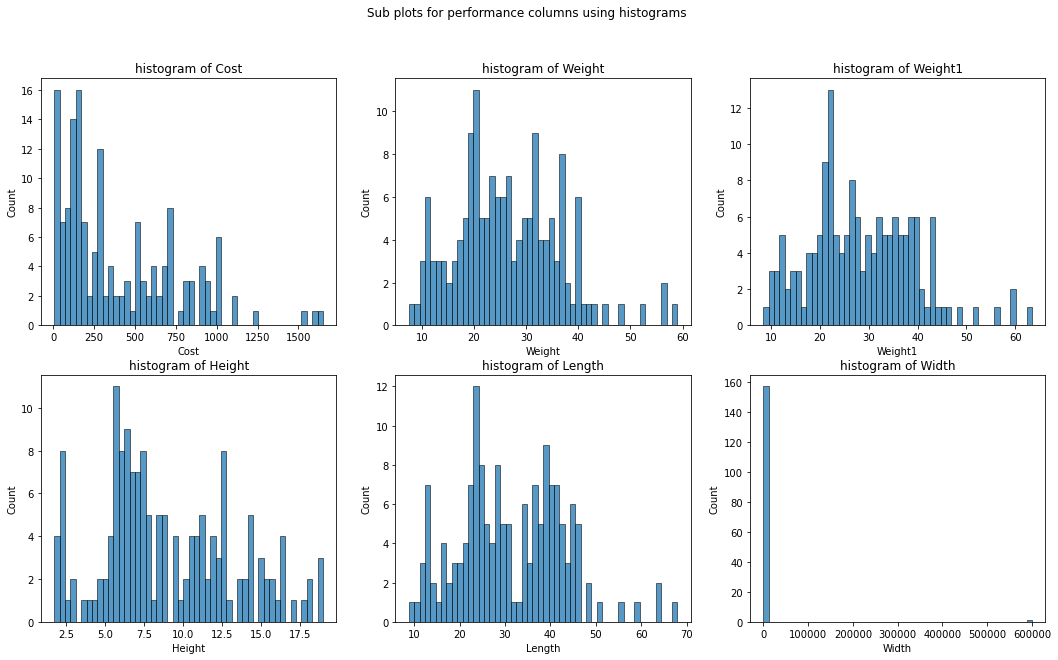

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Sub plots for performance columns using histograms')
sns.histplot(ax=axes[0, 0],data=data,x='Cost',bins=50).set(title="histogram of Cost")
sns.histplot(ax=axes[0, 1],data=data,x='Weight',bins=50).set(title="histogram of Weight")
sns.histplot(ax=axes[0, 2],data=data,x='Weight1',bins=50).set(title="histogram of Weight1")
sns.histplot(ax=axes[1, 0],data=data,x='Height',bins=50).set(title="histogram of Height")
sns.histplot(ax=axes[1, 1],data=data,x='Length',bins=50).set(title="histogram of Length")
sns.histplot(ax=axes[1, 2],data=data,x='Width',bins=50).set(title="histogram of Width")

<span style='color:Black'>
<b>

Relationship plots to check the relation between each feature with the dependant variable 
</b>
</span>

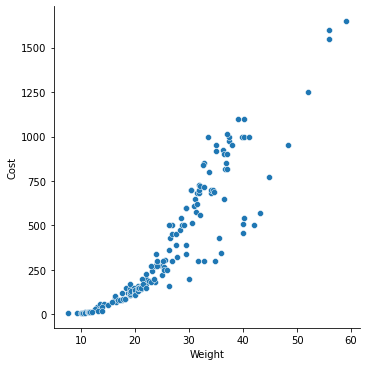

In [16]:
sns.relplot(x="Weight",y= "Cost",data=data)
#Relationship plot between 'Weight' & 'Cost'

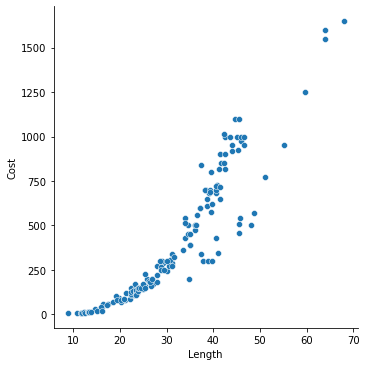

In [17]:
sns.relplot(x="Length",y= "Cost",data=data)
#Relationship plot between 'Length' & 'Cost'

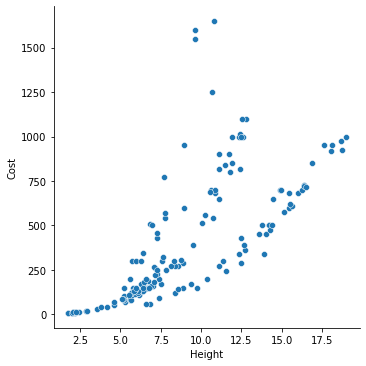

In [18]:
sns.relplot(x="Height",y= "Cost",data=data)
#Relationship plot between 'Height' & 'Cost'

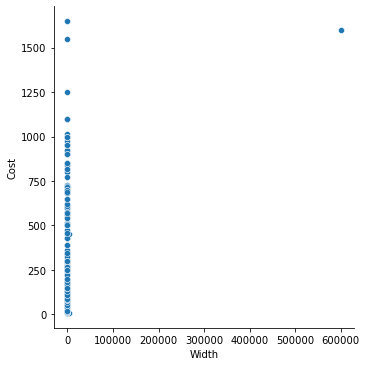

In [19]:
sns.relplot(x="Width",y= "Cost",data=data)
#Relationship plot between 'Width' & 'Cost'

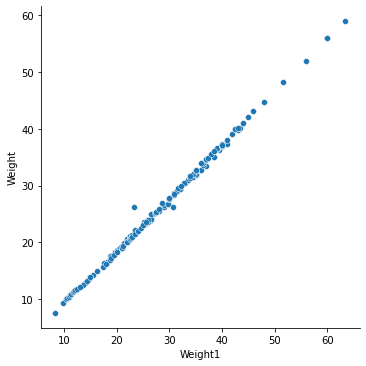

In [20]:
sns.relplot(x="Weight1",y= "Weight",data=data)


<span style='color:Black'>
<b>
<i>
Weight & Weight1 columns seem to be very linear hence only 1 of these columns could be considered
It would just be a duplicate to use both of these since they are both same attribute too
Hence I am going to drop Weight1 from my dataframe going forward
</i>
</b>
</span>


<span style='color:Black'>
<b>

BOX PLOT FOR BETTER UNDERSTANDING OF DATA DISTRIBUTION AND OUTLIER DETECTION 
</b>
</span>


[Text(0.5, 1.0, 'boxplot of Width')]

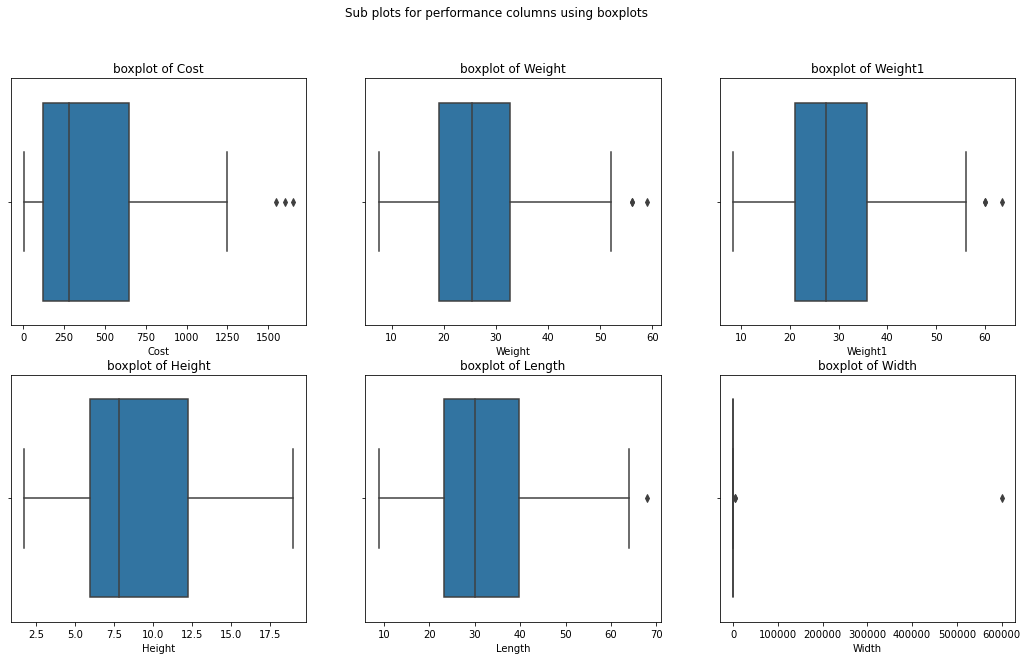

In [21]:
#Now lets do boxplots for all the columns for better understanding of outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Sub plots for performance columns using boxplots')
sns.boxplot(ax=axes[0, 0],data=data,x='Cost').set(title="boxplot of Cost")
sns.boxplot(ax=axes[0, 1],data=data,x='Weight').set(title="boxplot of Weight")
sns.boxplot(ax=axes[0, 2],data=data,x='Weight1').set(title="boxplot of Weight1")
sns.boxplot(ax=axes[1, 0],data=data,x='Height').set(title="boxplot of Height")
sns.boxplot(ax=axes[1, 1],data=data,x='Length').set(title="boxplot of Length")
sns.boxplot(ax=axes[1, 2],data=data,x='Width').set(title="boxplot of Width")

# OBSERVATIONS:


<span style='color:Black'>
<b>

BOX PLOT FOR COST:
</b>
</span>

The box plot for Cost shows that there are 3 outliers.
The same can be confirmed using IQR method

<span style='color:Black'>
<b>

BOX PLOT FOR WEIGHT:
</b>
</span>

This box plot for Weight feature shows that there are 2 outliers.
The same can be confirmed using IQR method

<span style='color:Black'>
<b>

BOX PLOT FOR WEIGHT1:
</b>
</span>

This box plot for Weight1 feature shows that there are 2 outliers.
I am anyways going to drop this feature hence ignoring the outliers here

<span style='color:Black'>
<b>

BOX PLOT FOR LENGTH:
</b>
</span>

This box plot for Weight1 feature shows that there is 1 outlier.
The same can be confirmed using IQR method

<span style='color:Black'>
<b>

BOX PLOT FOR HEIGHT:
</b>
</span>

The plot below seems to not have any outliers.

<span style='color:Black'>
<b>
    
BOX PLOT FOR WIDTH:
</b>
</span>

When we try to esblish a relationship between two features, outliers can distort the coorelation. 
There seems to be a very large value in Width column which needs to be treated most importantly


<span style='color:Black'>
<i>
<b>

As per the above inferences, I am going to drop the Weight1 feature and taking the rest of the features into a new dataframe for future computations
</b>
</i>
</span>


In [22]:
datanew=data[['Cost','Weight','Length','Height','Width']]
datanew.head()

,Cost,Weight,Length,Height,Width
0,242.0,23.2,30.0,11.5200,4.0200
1,290.0,24.0,31.2,12.4800,4.3056
2,340.0,23.9,31.1,12.3778,4.6961
3,363.0,26.3,33.5,12.7300,4.4555
4,430.0,26.5,34.0,12.4440,5.1340


<span style='color:Black'>
<b>

HEAT MAP to check the correlation between the features
</b>
</span>


<AxesSubplot:>

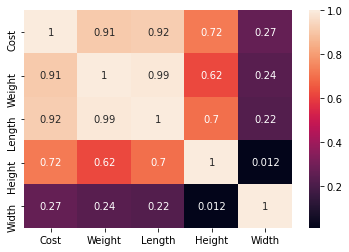

In [23]:
correlation = datanew.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

<span style='color:Black'>
<i>
<b>

This map shows that the Width feature doesnt have good correlation with Cost 
However, there is an outlier in Width which might have impacted this. Let's first treat the outliers to confirm this
</b>
</i>
</span>


# DETECTING OUTLIERS AND TREATING THEM USING IQR METHOD

In [24]:
#Finding IQR in 'Cost' to identify Outliers
Q1 = np.percentile(datanew.Cost, 25, interpolation = 'midpoint') 
Q3 = np.percentile(datanew.Cost, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q3 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

#Another way to find IQR
#IQR = stats.iqr(datanew.Length, interpolation = 'midpoint')

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

#Finding Outliers of Cost variable
outlier =[]
for x in datanew['Cost']:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print('outlier in the Cost feature is', outlier)

#Calculating mean & median to check if the outliers can be replaced by one of them
median = float(datanew['Cost'].median())
mean = float(datanew['Cost'].mean())
print ('median,mean',median,mean)

#Instead of dropping the outliers, I am replacing with the upper_limit value
#Because in Cost column, the 3 outliers are present in the upper boundary and are almost closer to upper limit
datanew["Cost"] = np.where(datanew["Cost"] >up_lim, up_lim,datanew['Cost'])
datanew["Cost"] = np.where(datanew["Cost"] <low_lim, low_lim,datanew['Cost'])

# We can drop the outliers with below code but I am not going to drop them since we have small data
#index = datanew[(datanew['Cost'] > up_lim) ].index
#datanew.drop(index, inplace=True)

#index = datanew[(datanew['Cost'] < low_lim) ].index
#datanew.drop(index, inplace=True)

Q1 25 percentile of the given data is,  122.5
Q3 75 percentile of the given data is,  650.0
Interquartile range is 527.5
low_limit is -668.75
up_limit is 1441.25
outlier in the Cost feature is [1600.0, 1550.0, 1650.0]
median,mean 281.5 400.84746835443036


In [25]:
#Finding IQR in 'Weight' to identify Outliers
Q1 = np.percentile(datanew.Weight, 25, interpolation = 'midpoint') 
Q3 = np.percentile(datanew.Weight, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

#Finding Outliers of Weight variable
outlier =[]
for x in datanew['Weight']:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

#Calculating mean & median to check if the outliers can be replaced by one of them
median = float(datanew['Weight'].median())
mean = float(datanew['Weight'].mean())
print(' median,mean', median, mean)

#Instead of dropping the outliers, I am replacing with the upper_limit value
#Because in Weight column, the 3 outliers are present in the upper boundary and are almost closer to upper limit
datanew["Weight"] = np.where(datanew["Weight"] >up_lim, median,datanew['Weight'])
datanew["Weight"] = np.where(datanew["Weight"] <low_lim, median,datanew['Weight'])

Q1 25 percentile of the given data is,  19.200000000000003
Q1 75 percentile of the given data is,  32.7
Interquartile range is 13.5
low_limit is -1.0499999999999972
up_limit is 52.95
 outlier in the dataset is [56.0, 56.0, 59.0]
 median,mean 25.4 26.305821172297023


In [26]:
#Finding IQR in 'Length' to identify Outliers
Q1 = np.percentile(datanew.Length, 25, interpolation = 'midpoint') 
Q3 = np.percentile(datanew.Length, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

#Finding Outliers of Width variable
outlier =[]
for x in datanew['Length']:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

#Calculating mean & median to check if the outliers can be replaced by one of them
median = float(datanew['Length'].median())
mean = float(datanew['Length'].mean())
print('median,mean',median,mean)

#Instead of dropping the outliers, I am replacing with the upper_limit value
#Because in Length column, the outlier is present in the upper boundary and are almost closer to upper limit
datanew["Length"] = np.where(datanew["Length"] >up_lim, up_lim,datanew['Length'])
datanew["Length"] = np.where(datanew["Length"] <low_lim, low_lim,datanew['Length'])

Q1 25 percentile of the given data is,  23.2
Q1 75 percentile of the given data is,  39.650000000000006
Interquartile range is 16.450000000000006
low_limit is -1.475000000000012
up_limit is 64.32500000000002
 outlier in the dataset is [68.0]
median,mean 30.05 31.29265342092615


In [27]:
#Finding IQR in 'Width' to identify Outliers
Q1 = np.percentile(datanew.Width, 25, interpolation = 'midpoint') 
Q3 = np.percentile(datanew.Width, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)


#Another way to find IQR
#IQR = stats.iqr(datanew.Width, interpolation = 'midpoint')

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

#Finding Outliers of Width variable
outlier =[]
for x in datanew['Width']:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

#Calculating mean & median to check if the outliers can be replaced by one of them
median = float(datanew['Width'].median())
mean = float(datanew['Width'].mean())

print('median,mean',median,mean)

#Instead of dropping the outliers, I am replacing with the upper_limit value
#Because in Width column, the outliers are present in the upper boundary and are the biggest outliers 
datanew["Width"] = np.where(datanew["Width"] >up_lim, up_lim,datanew['Width'])
datanew["Width"] = np.where(datanew["Width"] <low_lim, low_lim,datanew['Width'])

Q1 25 percentile of the given data is,  3.40895
Q1 75 percentile of the given data is,  5.78955
Interquartile range is 2.3806000000000003
low_limit is -0.16195000000000048
up_limit is 9.36045
 outlier in the dataset is [3826.050501910828, 600000.0, 3826.050501910828]
median,mean 4.31405 3850.244798758365


In [28]:
#sns.pairplot(datanew, x_vars=['Weight','Weight','Length','Height','Width'], y_vars='Cost', height=7, aspect=0.7, kind='reg')

### CHECK BOX PLOT ONCE AGAIN TO RE-CONFIRM THE OUTLIERS 

<AxesSubplot:xlabel='variable', ylabel='value'>

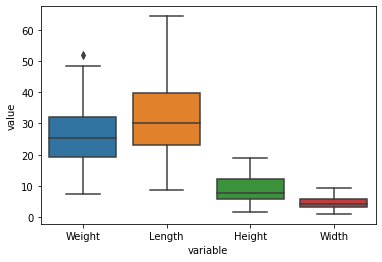

In [29]:
df_bag_boxplot = pd.DataFrame(data=datanew, columns=["Weight","Length","Height","Width"])
sns.boxplot(x="variable", y="value",data=pd.melt(df_bag_boxplot))

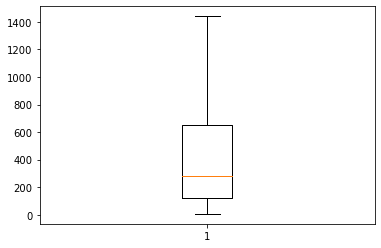

In [30]:
plt.boxplot(datanew["Cost"])
plt.show()

<b>
<i>
There is still an outlier in Weight feature however it is very close to the upper limit hence I am ignoring it
</i>
</b>

<AxesSubplot:>

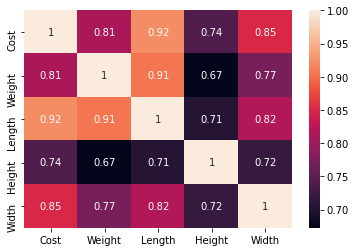

In [31]:
#Before dropping, let's get some more confirmation by checking heatmap & boxplots
correlation = datanew.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

<span style='color:Black'>
<b>
<i>
Now, Width feature seems to have correlation with Cost so can be used for our modeling.
</i>
</b>
</span>


# SPLITTING DATA AND SCALING DATA FOR NORMALIZATION

<span style='color:Black'>
<b>
Now lets start to prepare our data for Modeling. 
    

For this I am going to split the data into 80:20 for traindata:testdata 
                (tried with 70:30 & 60:40 but 80:20 lead to better results with my data)
    
Before splitting I am going to scale the data using StandardScaler
    
StandardScaler follows Standard Normal Distribution. Therefore, it makes mean = 0 and scales the data to unit variance.
</b>
</span>


In [37]:
scaler = StandardScaler()

datanew  = pd.DataFrame(scaler.fit_transform(datanew),columns = datanew.columns)

X = datanew.drop('Cost', axis=1)
y = datanew[["Cost"]]

#X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


<b>
<i>
I tried to use MinMaxScaler but the models seem to be better with StandardScaler hence discontinued MinMaxScaler
    </i>
</b>

In [38]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# datanew  = pd.DataFrame(scaler.fit_transform(datanew),columns = datanew.columns)

# X = datanew.drop('Cost', axis=1)
# y = datanew[["Cost"]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# OLS METHOD

<b>

Adding Constant to my X in order to get intercept
</b>

In [39]:
import statsmodels.api as sm 
model= sm.OLS(y_train,sm.add_constant(X_train)).fit()          #fitting the model
print("model summary:",model.summary() )

model summary:                             OLS Regression Results                            
Dep. Variable:                   Cost   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     249.0
Date:                Sun, 30 May 2021   Prob (F-statistic):           2.20e-57
Time:                        12:00:22   Log-Likelihood:                -36.473
No. Observations:                 126   AIC:                             82.95
Df Residuals:                     121   BIC:                             97.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0199      0.029     

<b>
<i>
The P values for all the features seem to be very less, hence this seems to be good
</i>
</b>

In [40]:
model_predict = model.predict(sm.add_constant(X_train))

model_rmse = (np.sqrt(mean_squared_error(y_train, model_predict)))
print("rmse on training dataset using statsmodel: ",model_rmse)

model_mse = mean_squared_error(y_train, model_predict)
print("mse on training dataset using statsmodel: ",model_mse)

model_r2_score = r2_score(y_train, model_predict)
print("r2 score on training data set using statsmodel: ",model_r2_score)

rmse on training dataset using statsmodel:  0.32320403397161696
mse on training dataset using statsmodel:  0.10446084757552614
r2 score on training data set using statsmodel:  0.8916696610200369


<b>
Testing the Model with testset and calculating the statistics
</b>

In [41]:
model_predict = model.predict(sm.add_constant(X_test))

model_rmse = (np.sqrt(mean_squared_error(y_test, model_predict)))
print("rmse on test dataset using statsmodel: ",model_rmse)

model_mse = mean_squared_error(y_test, model_predict)
print("mse on test dataset using statsmodel: ",model_mse)

model_r2_score = r2_score(y_test, model_predict)
print("r2 score on test data set using statsmodel: ",model_r2_score)

rmse on test dataset using statsmodel:  0.3535780174259422
mse on test dataset using statsmodel:  0.12501741440685987
r2 score on test data set using statsmodel:  0.8879220397261601


# LINEAR REGRESSION USING SKLEARN

<b>
    
Fitting multiple linear regression to trainingset using Sklearn, just to cross-check the OLS method statistics
</b>

In [42]:
reg = LinearRegression().fit(X_train,y_train)

print("Coefficients are:", reg.coef_)
print("Intercept is:", reg.intercept_)
Coef = (reg.coef_)
Int = (reg.intercept_)

ne_rmse = math.sqrt(mean_squared_error(reg.predict(X_train),y_train))
ne_rse = (ne_rmse**2)*X_train.shape[0]
ne_rse/= X_train.shape[0]-2
ne_rse = math.sqrt(ne_rse)
ne_mse = ne_rmse**2
print("rmse: ",ne_rmse)
print("mse: ",ne_mse)
print("rse: ",ne_rse)
print("r2 score of training dataset:" , reg.score(X_train,y_train))

Coefficients are: [[-0.24478328  0.83191319  0.11562902  0.26442902]]
Intercept is: [-0.01985858]
rmse:  0.32320403397161696
mse:  0.10446084757552612
rse:  0.3258000920131493
r2 score of training dataset: 0.8916696610200369


In [43]:
y_pred = reg.predict(X_test)

ne_rmse = math.sqrt(mean_squared_error(y_pred,y_test))
ne_rse = (ne_rmse**2)*X_test.shape[0]
ne_rse/= X_test.shape[0]-2
ne_rse = math.sqrt(ne_rse)
ne_mse = ne_rmse**2
print("rmse: ",ne_rmse)
print("mse: ",ne_mse)
print("rse: ",ne_rse)
print("r2 score of test dataset:" , reg.score(X_test,y_test))

rmse:  0.3535780174259424
mse:  0.12501741440686004
rse:  0.36517380615352285
r2 score of test dataset: 0.88792203972616


<b>
<i>
The results of OLS Method & Linear Regression using Sklearn are matching
</i>
</b>

# STOCHASTIC GRADIENT DESCENT METHOD

<b>
    
Tried with various iterations, tolerance rate and eta values and found these to be giving better results
</b>

In [44]:
sgd_reg = SGDRegressor(max_iter=1000,tol=0.0001,eta0=0.001)
sgd_reg.fit(X_train,y_train['Cost'])

print("Coefficients are:", sgd_reg.coef_)
print("Intercept is:", sgd_reg.intercept_)

sgd_rmse2 = math.sqrt(mean_squared_error(sgd_reg.predict(X_train),y_train))
y_pred = sgd_reg.predict(X_train)
sgd_rse2 = (sgd_rmse2**2)*X_train.shape[0]
sgd_rse2/= X_train.shape[0]-2
sgd_rse2 = math.sqrt(sgd_rse2)
sgd_mse2 = sgd_rmse2**2
print("rmse: ",sgd_rmse2)
print("mse: ",sgd_mse2)
print("rse: ",sgd_rse2)
print("r2 score:" , sgd_reg.score(X_train,y_train))

Coefficients are: [0.18394347 0.33579118 0.18670391 0.27248671]
Intercept is: [-0.0123551]
rmse:  0.39287496150093953
mse:  0.15435073537436472
rse:  0.39603063437602126
r2 score: 0.8399317268336142


In [45]:
sgd_rmse2 = math.sqrt(mean_squared_error(sgd_reg.predict(X_test),y_test))
y_pred = sgd_reg.predict(X_test)
sgd_rse2 = (sgd_rmse2**2)*X_test.shape[0]
sgd_rse2/= X_test.shape[0]-2
sgd_rse2 = math.sqrt(sgd_rse2)
sgd_mse2 = sgd_rmse2**2
print("rmse: ",sgd_rmse2)
print("mse: ",sgd_mse2)
print("rse: ",sgd_rse2)
print("r2 score:" , sgd_reg.score(X_test,y_test))

rmse:  0.3307217654368028
mse:  0.10937688613363562
rse:  0.3415679706040141
r2 score: 0.9019437543391614



# GRADIENT DESCENT APPROACH

<b>
    
Tried this method also with various learning rates and number of iterations and concluded on below values
    learning_rate = 0.001
    num_iterations = 1000
</b>

In [46]:
#Y=w0+w1X1+w2X2+w3x3+w4x4
def compute_error(X0, X1, X2, X3, Y, start_vector):
    y_pred = start_vector[0]+start_vector[1]*X0+start_vector[2]*X1+start_vector[3]*X2+start_vector[4]*X3
    y_error = Y - y_pred
    sse = np.sum(np.square(y_error))
    sse1 = np.mean(sse)
    return sse1

def stepGradient(start_vector, X0, X1, X2, X3, Y, learningRate):
    w0_gradient = 0
    w1_gradient = 0 
    w2_gradient = 0
    w3_gradient = 0
    w4_gradient = 0
    w0_gradient1= 0
    
    error = compute_error(X0,X1,X2,X3, Y,start_vector)
    
    w0_gradient = np.mean((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)
    w1_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X0)
    w2_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X1)
    w3_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X2)
    w4_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X3)
     
    new_w0 = start_vector[0] - (learningRate * w0_gradient) 
    new_w1 = start_vector[1] - (learningRate * w1_gradient) 
    new_w2 = start_vector[2] - (learningRate * w2_gradient)
    new_w3 = start_vector[3] - (learningRate * w3_gradient)
    new_w4 = start_vector[4] - (learningRate * w4_gradient)
    
    return [new_w0, new_w1, new_w2, new_w3, new_w4,error]

def gradient_descent(X0, X1, X2, X3, Y, start_vector, learning_rate, num_iteartions):

    cost = np.empty(num_iterations, dtype=float)
    
    for i in range(num_iterations):
        [w0,w1,w2,w3,w4,error] = stepGradient(start_vector, X0, X1, X2, X3, Y, learning_rate)
        start_vector = [w0,w1,w2,w3,w4]
        cost[i] = error
        if (i !=0 and cost[i] > cost[i-1]):
            j = i
            i = num_iterations
            break
        print('error',cost[i])
    return [w0,w1,w2,w3,w4,cost,j] 

def compute_Yhat(X0,X1,X2,X3,Y,start_vector):
    y_pred = start_vector[0]+start_vector[1]*X0+start_vector[2]*X1+start_vector[3]*X2+start_vector[4]*X3
    y_error = (Y - y_pred)
    return y_pred

In [47]:
w0 = 0
w1 = 0 
w2 = 0  
w3 = 0  
w4 = 0
j = 0

learning_rate = 0.001
num_iterations = 1000

X0 = X_train['Weight']
X1 = X_train['Length']
X2 = X_train['Height']
X3 = X_train['Width']
y  = y_train['Cost']
cost = np.empty(num_iterations, dtype=float)

[w0, w1, w2, w3, w4,cost,j] = gradient_descent(X0 ,X1, X2, X3, y, [w0, w1, w2, w3, w4], learning_rate, num_iterations)
num_iterations = j

print("After {0} iterations w0 = {1}, w1 = {2}, w2 = {3}, w3 = {4}, w4 = {5} error = {6}, learning_rate = {7}".format(num_iterations, w0, w1, w2, w3, w4,
                            compute_error(X0,X1,X2,X3, y, [w0, w1, w2, w3, w4]),learning_rate))
error = compute_error(X0,X1,X2,X3, y, [w0, w1, w2, w3, w4])

error 121.66264557067119
error 121.03752602247097
error 120.41576271432648
error 119.79733908526735
error 119.18223865378968
error 118.57044501747923
error 117.96194185263613
error 117.35671291390142
error 116.75474203388539
error 116.15601312279775
error 115.56051016807932
error 114.96821723403576
error 114.37911846147273
error 113.79319806733295
error 113.21044034433505
error 112.63082966061386
error 112.0543504593626
error 111.4809872584768
error 110.91072465019973
error 110.3435473007696
error 109.77943995006838
error 109.21838741127247
error 108.66037457050471
error 108.10538638648822
error 107.55340789020194
error 107.00442418453747
error 106.45842044395815
error 105.91538191415894
error 105.37529391172863
error 104.83814182381326
error 104.30391110778109
error 103.77258729088949
error 103.24415596995308
error 102.71860281101355
error 102.19591354901105
error 101.67607398745707
error 101.15906999810912
error 100.64488752064642
error 100.13351256234778
error 99.62493119777038
erro

error 27.516794104826577
error 27.440176701943177
error 27.36414490975119
error 27.288695587462374
error 27.213825609858148
error 27.1395318672149
error 27.065811265229527
error 26.992660724945328
error 26.920077182678288
error 26.848057589943693
error 26.77659891338305
error 26.70569813469152
error 26.635352250545413
error 26.565558272530296
error 26.4963132270693
error 26.427614155351808
error 26.35945811326246
error 26.291842171310524
error 26.22476341455957
error 26.158218942557532
error 26.09220586926702
error 26.02672132299603
error 25.961762446328954
error 25.89732639605795
error 25.83341034311456
error 25.77001147250178
error 25.70712698322629
error 25.64475408823115
error 25.58289001432875
error 25.521532002134084
error 25.460677305998313
error 25.40032319394276
error 25.34046694759301
error 25.28110586211356
error 25.22223724614257
error 25.163858421727088
error 25.105966724258494
error 25.048559502408246
error 24.99163411806399
error 24.935187946265888
error 24.8792183751433

Text(0, 0.5, 'Cost')

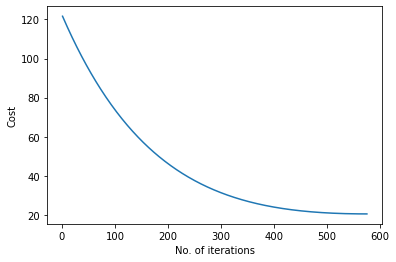

In [48]:
cost = list(cost)
n_iterations = [x for x in range(1,j+1)]
plt.plot(n_iterations, cost[0:j])
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [49]:
l=X_train.shape[0]
X0 = X_train['Weight']
X1 = X_train['Length']
X2 = X_train['Height']
X3 = X_train['Width']
y  = y_train['Cost']

y_hat = compute_Yhat(X0,X1,X2,X3, y, [w0,w1,w2,w3,w4])

r2 = r2_score(y, y_hat)
print('r2 score for GD model is', r2)

gd_mse = error/l
gd_rmse = (np.sqrt(gd_mse))
# RSE - Residual Sum of Error . 
gd_rse = error/(l-2)
gd_rse = math.sqrt(gd_rse)
print('RSE: Residual Square Sum of  Error: ', gd_rse)
print("mse, rmse on training dataset using statsmodel: ",gd_mse, gd_rmse)

r2 score for GD model is 0.8314906888028986
RSE: Residual Square Sum of  Error:  0.4063386218072241
mse, rmse on training dataset using statsmodel:  0.16249026484882612 0.403100812265153


In [50]:
l=X_test.shape[0]
X0 = X_test['Weight']
X1 = X_test['Length']
X2 = X_test['Height']
X3 = X_test['Width']
y  = y_test['Cost']

y_hat = compute_Yhat(X0,X1,X2,X3, y, [w0,w1,w2,w3,w4])

r2 = r2_score(y, y_hat)
print('r2 score for GD model is', r2)

y_error = y - y_hat
gd_mse = np.mean(np.sum(np.square(y_error)))/l
gd_rmse = (np.sqrt(gd_mse))
# RSE - Residual Sum of Error . 
gd_rse = gd_mse*l/(l-2)
gd_rse = math.sqrt(gd_rse)
print('RSE: Residual Square Sum of  Error: ', gd_rse)
print("mse, rmse on test dataset using statsmodel: ",gd_mse, gd_rmse)

r2 score for GD model is 0.9038068990189688
RSE: Residual Square Sum of  Error:  0.33830737977438086
mse, rmse on test dataset using statsmodel:  0.10729864050919423 0.32756471194131126


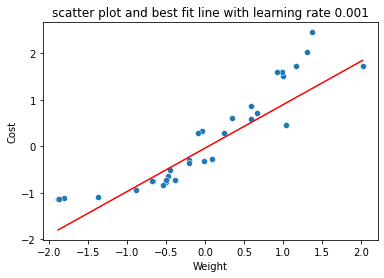

In [51]:
sns.scatterplot(x=X3,y=y).set(title="scatter plot and best fit line with learning rate 0.001",xlabel="Weight",ylabel="Cost")
                
plt.plot([min(X3),max(X3)],[min(y_hat),max(y_hat)],color='red')
plt.show()

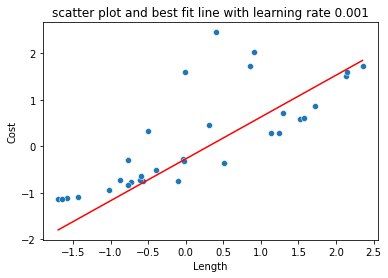

In [52]:
sns.scatterplot(x=X2,y=y).set(title="scatter plot and best fit line with learning rate 0.001",xlabel="Length",ylabel="Cost")
                
plt.plot([min(X2),max(X2)],[min(y_hat),max(y_hat)],color='red')
plt.show()

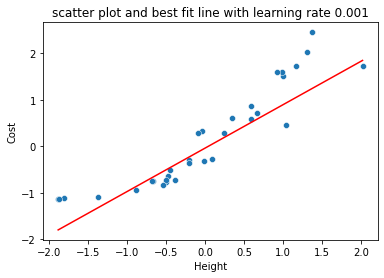

In [53]:
sns.scatterplot(x=X3,y=y).set(title="scatter plot and best fit line with learning rate 0.001",xlabel="Height",ylabel="Cost")
                
plt.plot([min(X3),max(X3)],[min(y_hat),max(y_hat)],color='red')
plt.show()

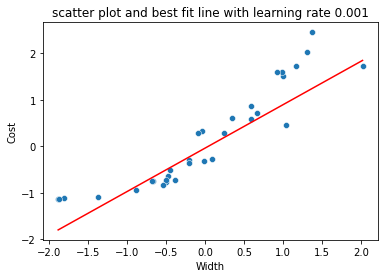

In [54]:
sns.scatterplot(x=X3,y=y).set(title="scatter plot and best fit line with learning rate 0.001",xlabel="Width",ylabel="Cost")
                
plt.plot([min(X3),max(X3)],[min(y_hat),max(y_hat)],color='red')
plt.show()

# MINI BATCH GRADIENT DESCENT APPROACH

<b>
    
Tried this method also with various learning , batch size and number of iterations and concluded on below values
    learning_rate = 0.0001
    num_iterations = 1000
    batch size = 20
</b>

In [55]:
#Y=w0+w1X1+w2X2+w3x3+w4x4
def compute_error(X0, X1, X2, X3, Y, start_vector):
    y_pred = start_vector[0]+start_vector[1]*X0+start_vector[2]*X1+start_vector[3]*X2+start_vector[4]*X3
    y_error = Y - y_pred
    sse = np.sum(np.square(y_error))
    return sse

def stepGradient(start_vector, X0, X1, X2, X3, Y, learningRate):
    w0_gradient = 0
    w1_gradient = 0 
    w2_gradient = 0
    w3_gradient = 0
    w4_gradient = 0

    error = compute_error(X0,X1,X2,X3, Y,start_vector)

    w0_gradient = np.mean((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)
    w1_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X0)
    w2_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X1)
    w3_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X2)
    w4_gradient = np.mean(((start_vector[0]+(start_vector[1]*X0)+(start_vector[2]*X1)+(start_vector[3]*X2))-Y)*X3)
   
    new_w0 = start_vector[0] - (learningRate * w0_gradient) 
    new_w1 = start_vector[1] - (learningRate * w1_gradient) 
    new_w2 = start_vector[2] - (learningRate * w2_gradient)
    new_w3 = start_vector[3] - (learningRate * w3_gradient)
    new_w4 = start_vector[4] - (learningRate * w4_gradient)
    
    return [new_w0, new_w1, new_w2, new_w3, new_w4, error]

def mini_gradient_descent(X0, X1, X2, X3, Y, start_vector, learning_rate, num_iteartions,b):
    w0 = 0
    w1 = 0
    w2 = 0
    w3 = 0
    w4 = 0
    N = Y.shape[0]
    
    for i in range(0,N,b):
        X0_i = X0[i:i+b]
        X1_i = X1[i:i+b]
        X2_i = X2[i:i+b]
        X3_i = X3[i:i+b]
        Y_i  = Y[i:i+b]

        [w0,w1,w2,w3,w4,error] = stepGradient(start_vector, X0_i, X1_i, X2_i, X3_i, Y_i, learning_rate)
        start_vector = [w0,w1,w2,w3,w4]
        error = compute_error(X0,X1,X2,X3, Y,start_vector)

    return [w0,w1,w2,w3,w4,error] 

def compute_Yhat(X0,X1,X2,X3,Y,start_vector):
    y_pred = start_vector[0]+start_vector[1]*X0+start_vector[2]*X1+start_vector[3]*X2+start_vector[4]*X3
    y_error = (Y - y_pred)
    return y_pred

In [56]:
w0 = 0
w1 = 0
w2 = 0
w3 = 0
w4 = 0

learning_rate = 0.0001
num_iterations = 1000
cost = np.empty(num_iterations, dtype=float)
#scale the data

X0 = X_train['Weight']
X1 = X_train['Length']
X2 = X_train['Height']
X3 = X_train['Width']
y  = y_train['Cost']

i = 0
j = 0
b = 10

for i in range(num_iterations):
    [w0, w1, w2, w3, w4, error] = mini_gradient_descent(X0 ,X1, X2, X3, y, [w0, w1, w2, w3, w4], learning_rate, num_iterations,b)
    cost[i] = error
    if (i !=0 and cost[i] > cost[i-1]):
        j = i
        i = num_iterations
        break
    print('error is ', cost[i])
num_iterations = j
print("After {0} iterations w0 = {1}, w1 = {2}, w2 = {3}, w3 = {4}, w4 = {5} error = {6}, learning_rate = {7}".format(num_iterations, w0, w1, w2, w3, w4,
                            compute_error(X0,X1,X2,X3, y, [w0, w1, w2, w3, w4]),learning_rate))
error = compute_error(X0,X1,X2,X3, y, [w0, w1, w2, w3, w4])

error is  120.85950791313232
error is  120.0619389908093
error is  119.26990317459344
error is  118.4833650573173
error is  117.70228945238728
error is  116.92664139242449
error is  116.15638612791386
error is  115.39148912586172
error is  114.63191606846144
error is  113.87763285176734
error is  113.12860558437683
error is  112.38480058612035
error is  111.64618438675971
error is  110.91272372469419
error is  110.1843855456746
error is  109.46113700152532
error is  108.7429454488741
error is  108.02977844788971
error is  107.32160376102729
error is  106.61838935178136
error is  105.92010338344672
error is  105.22671421788658
error is  104.53819041430859
error is  103.85450072804814
error is  103.17561410935929
error is  102.50149970221301
error is  101.83212684310298
error is  101.1674650598583
error is  100.50748407046413
error is  99.85215378188884
error is  99.20144428891903
error is  98.5553258730012
error is  97.91376900109087
error is  97.27674432450846
error is  96.644222677802

error is  25.275690635734342
error is  25.201386487284967
error is  25.127870685685906
error is  25.055137678271887
error is  24.9831819482838
error is  24.91199801464429
error is  24.841580431734627
error is  24.771923789173158
error is  24.703022711594897
error is  24.634871858432636
error is  24.56746592369933
error is  24.500799635771862
error is  24.434867757176136
error is  24.369665084373416
error is  24.305186447548135
error is  24.241426710396908
error is  24.178380769918835
error is  24.1160435562072
error is  24.054410032242302
error is  23.993475193685736
error is  23.933234068675795
error is  23.873681717624237
error is  23.814813233014245
error is  23.756623739199682
error is  23.699108392205506
error is  23.642262379529544
error is  23.58608091994536
error is  23.530559263306426
error is  23.475692690351433
error is  23.4214765125109
error is  23.36790607171485
error is  23.314976740201818
error is  23.262683920328907
error is  23.211023044383076
error is  23.15998957439

Text(0, 0.5, 'Cost')

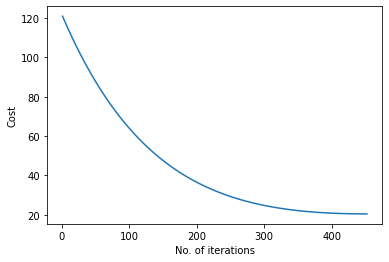

In [57]:
cost = list(cost)
len(cost)
n_iterations = [x for x in range(1,j+1)]
plt.plot(n_iterations, cost[0:j])
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [58]:
l=X_train.shape[0]
model_mse = (error)*1/(l)
model_rmse = (np.sqrt(model_mse))

X0 = X_train['Weight']
X1 = X_train['Length']
X2 = X_train['Height']
X3 = X_train['Width']
y  = y_train['Cost']

y_hat = compute_Yhat(X0,X1,X2,X3, y, [w0,w1,w2,w3,w4])

r2 = r2_score(y, y_hat)
print('r2 score for Mini Batch GD model is', r2)

mbgd_mse = error/l
mbgd_rmse = (np.sqrt(mbgd_mse))
# RSE - Residual Sum of Error . 
mbgd_rse = error/(l-2)
mbgd_rse = math.sqrt(mbgd_rse)
print('RSE: Residual Square Sum of  Error: ', mbgd_rse)
print("mse, rmse on training dataset using statsmodel: ",model_mse, model_rmse)

r2 score for Mini Batch GD model is 0.8314331415915641
RSE: Residual Square Sum of  Error:  0.40640799974928926
mse, rmse on training dataset using statsmodel:  0.1625457565100561 0.40316963738612077


In [59]:
X0 = X_test['Weight']
X1 = X_test['Length']
X2 = X_test['Height']
X3 = X_test['Width']
y  = y_test['Cost']

y_hat = compute_Yhat(X0,X1,X2,X3, y, [w0,w1,w2,w3,w4])

r2 = r2_score(y, y_hat)
print('r2 score for Mini Batch GD model is', r2)

l=X_test.shape[0]
y_error = y - y_hat
mbgd_mse  = (np.sum(np.square(y_error)))/l
mbgd_rmse = (np.sqrt(mbgd_mse))

# RSE - Residual Sum of Error . 
mbgd_rse = mbgd_mse*l/(l-2)
mbgd_rse = math.sqrt(mbgd_rse)
print('RSE: Residual Square Sum of  Error: ', gd_rse)
print("mse, rmse on test dataset using statsmodel: ",mbgd_mse, mbgd_rmse)

r2 score for Mini Batch GD model is 0.9036608508283211
RSE: Residual Square Sum of  Error:  0.33830737977438086
mse, rmse on test dataset using statsmodel:  0.10746155003332339 0.32781328532157356


# RESULTS FROM THE 4 MODELS:

In [60]:
# OLS METHOD:

# On Training Data:
# rmse    :  0.32320403397161696
# mse     :  0.10446084757552614
# r2 score:  0.8916696610200369

# On Test Data:
# rmse    :  0.3535780174259422
# mse     :  0.12501741440685987
# r2 score:  0.8879220397261601

# LINEAR REGRESSION using Sklearn:
    
# On Training Data:
# rmse    :  0.32320403397161696
# mse     :  0.10446084757552612
# rse     :  0.3258000920131493
# r2 score:  0.8916696610200369

# On Test Data:
# rmse    :  0.3535780174259424
# mse     :  0.12501741440686004
# rse     :  0.36517380615352285
# r2 score:  0.88792203972616

# STOCHASTIC GRADIENT DESCENT APPROACH using Sklearn:

# On Training Data:
# rmse    :  0.39272650448077484
# mse     :  0.15423410732168807
# rse     :  0.39588098491083573
# r2 score:  0.8400526750814435

# On Test Data:   
# rmse    :  0.33066421102644866
# mse     :  0.10933882045374377
# rse     :  0.34150852866460013
# r2 score:  0.9019778801749816

# GRADIENT DESCENT APPROACH:
    
# On Training Data: 
# rmse    :  0.403100812265153 
# mse     :  0.16249026484882612 
# rse     :  0.4063386218072241
# r2 score:  0.8314906888028986

# On Test Data: 
# rmse    :  0.32756471194131126 
# mse     :  0.10729864050919423 
# rse     :  0.33830737977438086 
# r2 score:  0.9038068990189688

# MINI BATCH GRADIENT DESCENT APPROACH:
    
# On Training Data:    
# rmse    :  0.40316963738612077
# mse     :  0.1625457565100561 
# rse     :  0.40640799974928926
# r2 score:  0.8314331415915641

# On Test Data: 
# rmse    :  0.32781328532157356 
# mse     :  0.10746155003332339 
# rse     :  0.33830737977438086
# r2 score:  0.9036608508283211

# SUMMARY

<b>
HERE IS THE LIST OF THINGS I HAVE PERFORMED IN THIS PROJECT


1) EXPLORATORY DATA ANALYSIS

    (i)  Reading Data
    
    (ii) Understanding Data
    
    (iii)Dealing with Missing Values
    
    (iV) Plotting Data (Histograms, Relplots, Box plots and Heatmaps)
    
    (v)  Outlier Detection and treatment using IQR method
    
    (vi) Scaling of data using StandardScaler
    
    (vii)Splitting of data into trainset & testset
    
    
2) MODELING

    (i)  OLS Method & Linear Regression using Sklearn
    
    (ii) STOCHASTIC GRADIENT DESCENT using Sklearn
    
    (iii)GRADIENT DESCENT METHOD with convergence check included
    
    (iv) MINI-BATCH GRADIENT DESCENT METHOD with convergence check included
    
    
3) MODEL ANALYSIS

    (i) Analyse R2 score, MSE & RMSE values and conclude the best model
</b>
    
<b>
<i>
4) CONCLUSION
    
    By analyzing the R2 score and error values of the 4 models, I have concluded that for the given dataset, 
    "GRADIENT DESCENT" is the best model as we got better R2 score with less error in less number of iterations
    
    This again is not fixed, it depends on the extent and type of data cleaning that we do
    
    It also seems to be slightly overfitting looking at the R2 scores on test data and this may be again because of the way we did cleaning and the outlier treatment considered. But, considering the small input data and the amount of data cleaning I had performed, I am concluding that GRADIENT DESCENT is my best model among the 4 models.
</i>
</b>
